In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("C:/Users/Nantha/Documents/Glassdoor-Job-Salary-Prediction/EDA.csv")

In [58]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Seniority,Desc Length,No of Competitors
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,0,0,0,0,0,0,1,na,5126,0
1,Data Scientist,96-101,Overview\r\n\r\n\r\nData Scientist\r\n\r\nLoca...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,0,0,0,1,0,1,na,9845,0
2,Data Scientist,96-101,Search by Keyword\r\nMore Options\r\n\r\nSearc...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981,Company - Public,...,0,1,0,0,0,1,1,na,10692,2
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974,Company - Private,...,0,0,0,0,0,0,0,na,2187,3
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010,Company - Private,...,1,1,0,0,0,1,1,na,3736,0


In [59]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Seniority', 'Desc Length', 'No of Competitors'],
      dtype='object')

In [90]:
df_model = df[['Avg Salary','Rating','Size','Sector','Revenue','No of Competitors','Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics', 'Seniority',
       'Desc Length']]

In [91]:
df_model.head()

,Avg Salary,Rating,Size,Sector,Revenue,No of Competitors,Job State,Same State,Age,R,...,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Seniority,Desc Length
0,98.5,3.9,10000+ employees,Biotech & Pharmaceuticals,₹500+ billion (INR),0,MA,0,24,1,...,0,0,0,0,0,0,0,1,na,5126
1,98.5,4.0,1001 to 5000 employees,Business Services,₹10 to ₹50 billion (INR),0,MA,1,39,1,...,0,0,0,0,0,1,0,1,na,9845
2,98.5,4.1,1001 to 5000 employees,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),2,MA,1,39,0,...,0,0,1,0,0,0,1,1,na,10692
3,98.5,4.7,201 to 500 employees,Biotech & Pharmaceuticals,Unknown / Non-Applicable,3,MA,1,46,1,...,0,0,0,0,0,0,0,0,na,2187
4,98.5,4.7,201 to 500 employees,Aerospace & Defence,₹10 to ₹50 billion (INR),0,MA,1,10,0,...,0,1,1,0,0,0,1,1,na,3736


In [92]:
df_model.describe()

,Avg Salary,Rating,No of Competitors,Same State,Age,R,Python,AWS,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Desc Length
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,130.620000,3.291800,0.9340,0.379000,29.966000,0.355000,0.79200,0.224000,0.379000,0.282000,0.160000,0.558000,0.13900,0.008000,0.112000,0.014000,0.229000,0.803000,3346.141000
std,38.630272,1.667775,1.3362,0.485381,45.282197,0.478753,0.40608,0.417131,0.485381,0.450198,0.366789,0.496873,0.34612,0.089129,0.315524,0.117549,0.420399,0.397931,1622.923202
min,75.000000,-1.000000,0.0000,0.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000
25%,106.000000,3.300000,0.0000,0.000000,4.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2222.000000
50%,125.000000,3.800000,0.0000,0.000000,14.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3321.500000
75%,140.500000,4.200000,3.0000,1.000000,31.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,4266.000000
max,272.000000,5.000000,4.0000,1.000000,330.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,15121.000000


# Converting categorical into dummies

In [93]:
df_dum = pd.get_dummies(df_model)

In [94]:
df_dum.head()

,Avg Salary,Rating,No of Competitors,Same State,Age,R,Python,AWS,Excel,Spark,...,Revenue_₹500+ billion (INR),Job State_ CA,Job State_ CT,Job State_ MA,Job State_ NJ,Job State_ NY,Job State_ WA,Seniority_junior,Seniority_na,Seniority_senior
0,98.5,3.9,0,0,24,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,98.5,4.0,0,1,39,1,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,98.5,4.1,2,1,39,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
3,98.5,4.7,3,1,46,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,98.5,4.7,0,1,10,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


# Splitting into Independent(X) and Dependent(y) variables

In [95]:
X = df_dum.drop('Avg Salary',axis=1)
y = df_dum['Avg Salary']

# Splitting into Training and Testing data

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_test.columns

Index(['Rating', 'No of Competitors', 'Same State', 'Age', 'R', 'Python',
       'AWS', 'Excel', 'Spark', 'Tableau', 'SQL', 'TensorFlow', 'PowerBI',
       'SaS', 'Flask', 'Hadoop', 'Statistics', 'Desc Length', 'Size_-1',
       'Size_1 to 50 employees', 'Size_10000+ employees',
       'Size_1001 to 5000 employees', 'Size_201 to 500 employees',
       'Size_5001 to 10000 employees', 'Size_501 to 1000 employees',
       'Size_51 to 200 employees', 'Size_Unknown', 'Sector_-1',
       'Sector_Accounting & Legal', 'Sector_Aerospace & Defence',
       'Sector_Agriculture & Forestry',
       'Sector_Arts, Entertainment & Recreation',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Business Services',
       'Sector_Consumer Services', 'Sector_Education', 'Sector_Finance',
       'Sector_Government', 'Sector_Healthcare',
       'Sector_Information Technology', 'Sector_Insurance',
       'Sector_Manufacturing', 'Sector_Media', 'Sector_Non-Profits',
       'Sector_Oil, Gas, Energy & Utilitie

# OLS Linear Model

In [98]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)

C:\Users\Nantha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [99]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Avg Salary   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     5.072
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           3.88e-31
Time:                        23:17:00   Log-Likelihood:                -4917.0
No. Observations:                1000   AIC:                             9970.
Df Residuals:                     932   BIC:                         1.030e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            74.6322      4.613     16.179      0.000      65.579      83.685
Rating                                           -0.8958      1.024     -0.875      0.382      -2.905       1.113
No of Competitors                                -1.1851      1.200     -0.988      0.323      -3.539       1.169
Same State                                       -0.2562      2.675     -0.096      0.924      -5.507       4.994
Age                                              -0.0343      0.037     -0.915      0.360      -0.108       0.039
R                                                 1.7698      2.662      0.665      0.506      -3.454       6.993
Python                                            4.9783      3.267      1.524      0.128      -1.434      11.391
AWS                                              -1.6990      2.898     -0.586      0.558      -7.386       3.988
Excel                                             2.9010      2.418      1.200      0.230      -1.843       7.645
Spark                                            -2.0462      3.147     -0.650      0.516      -8.222       4.130
Tableau                                           1.8164      3.313      0.548      0.584      -4.685       8.318
SQL                                              -2.5003      2.599     -0.962      0.336      -7.601       2.600
TensorFlow                                        1.2645      3.508      0.360      0.719      -5.621       8.150
PowerBI                                          -7.9983     13.042     -0.613      0.540     -33.594      17.597
SaS                                               1.1841      3.853      0.307      0.759      -6.377       8.745
Flask                                            -6.9555      9.739     -0.714      0.475     -26.068      12.157
Hadoop                                           -1.0229      3.176     -0.322      0.747      -7.255       5.210
Statistics                                       -4.0814      3.014     -1.354      0.176      -9.996       1.833
Desc Length                                      -0.0008      0.001     -0.972      0.331      -0.003       0.001
Size_-1                                          11.9948      3.446      3.481      0.001       5.232      18.757
Size_1 to 50 employees                            1.8709      3.578      0.523      0.601      -5.151       8.892
Size_10000+ employees                            11.2061      5.180      2.163      0.031       1.040      21.372
Size_1001 to 5000 employees                      13.9146      3.453      4.030      0.000       7.138      20.691
Size_201 to 500 employees                         4.0393      4.188      0.964      0.335      -4.180      12.259
Size_

# Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression,Lasso
lm = LinearRegression()

In [101]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error',cv=3))

[-26.61702369 -26.21981111 -26.05511332]


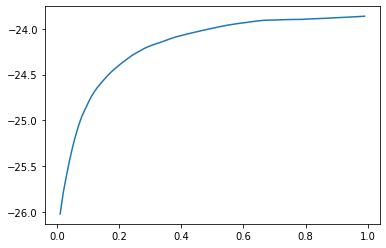

In [103]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [104]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-23.862324


In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [106]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-26.711004281928293

In [24]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [25]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
  

In [26]:
gs.best_score_

-23.937830357142857

In [27]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [107]:
lml.fit(X_train, y_train)

Lasso(alpha=0.99, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
y_pred_lm = lm.predict(X_test)
y_pred_lml = lml.predict(X_test)
# y_pred_rf = gs.best_estimator_.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
print("Linear Regression MAE :",mean_absolute_error(y_test,y_pred_lm))
print("Lasso Regression MAE :",mean_absolute_error(y_test,y_pred_lml))
# print("Random Forest Regression MAE :",mean_absolute_error(y_test,y_pred_rf))

Linear Regression MAE : 25.457557660452593
Lasso Regression MAE : 24.20376609794922


In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150),
        'max_features':sp_randint(1,30),
        'max_depth':sp_randint(2,15),
        'min_samples_leaf':sp_randint(1,50),
        'min_samples_split':sp_randint(2,50),
        'criterion':['mse','mae']}

In [112]:
rsearch=RandomizedSearchCV(rf,param_distributions=params,n_jobs=-1,scoring='neg_mean_absolute_error',n_iter=100,cv=3)

In [113]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [114]:
rsearch.best_score_

-22.14552083333333

In [115]:
rsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=9,
                      max_features=22, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=16, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
y_pred_rf_rsearch = rsearch.best_estimator_.predict(X_test)

In [117]:
print("Random Forest random search cv MAE :",mean_absolute_error(y_test,y_pred_rf_rsearch))

Random Forest random search cv MAE : 23.089583333333334


In [123]:
X_test.shape

(200, 73)

In [124]:
X_test.columns

Index(['Rating', 'No of Competitors', 'Same State', 'Age', 'R', 'Python',
       'AWS', 'Excel', 'Spark', 'Tableau', 'SQL', 'TensorFlow', 'PowerBI',
       'SaS', 'Flask', 'Hadoop', 'Statistics', 'Desc Length', 'Size_-1',
       'Size_1 to 50 employees', 'Size_10000+ employees',
       'Size_1001 to 5000 employees', 'Size_201 to 500 employees',
       'Size_5001 to 10000 employees', 'Size_501 to 1000 employees',
       'Size_51 to 200 employees', 'Size_Unknown', 'Sector_-1',
       'Sector_Accounting & Legal', 'Sector_Aerospace & Defence',
       'Sector_Agriculture & Forestry',
       'Sector_Arts, Entertainment & Recreation',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Business Services',
       'Sector_Consumer Services', 'Sector_Education', 'Sector_Finance',
       'Sector_Government', 'Sector_Healthcare',
       'Sector_Information Technology', 'Sector_Insurance',
       'Sector_Manufacturing', 'Sector_Media', 'Sector_Non-Profits',
       'Sector_Oil, Gas, Energy & Utilitie

# Converting Model into pickle

In [118]:
import pickle
pickl = {'model': rsearch.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

Pickling converts the object into a byte stream which can be stored, transferred, and converted back to the original model at a later time. Pickles are one of the ways python lets you save just about any object out of the box.

In [119]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [120]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([114.34375])

In [121]:
list(X_test.iloc[1,:])

[5.0,
 0.0,
 1.0,
 4.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 3912.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]